# Sampling, Estimation, and the Law of Large Numbers (ML Perspective)

This notebook builds intuition for **why machine learning works with limited data**, how estimates improve with more samples, and why Gaussian assumptions appear everywhere in ML.

---

## A. Sampling Methods

Sampling determines **how training data represents the true data-generating process**. Poor sampling leads to biased models, no matter how good the algorithm is.

---

### 1. Random Sampling

**What it is**  
Each data point has an equal chance of being selected.

**Why it matters in ML**
- Ensures training data is representative of the population.
- Prevents systematic bias in learned models.
- Most ML theory assumes random sampling (i.i.d. assumption).

**ML intuition**
Random sampling allows empirical risk minimization to approximate true risk.

---

### 2. Stratified Sampling

**What it is**  
Data is divided into strata (groups), and samples are drawn proportionally from each group.

**Why it matters in ML**
- Maintains class balance in training and validation sets.
- Prevents minority classes from being ignored.
- Commonly used in classification problems.

**ML intuition**
Stratification reduces variance in estimates for imbalanced datasets.

---

### 3. Bootstrapping

**What it is**  
Sampling **with replacement** from the original dataset.

**Why it matters in ML**
- Allows estimation of uncertainty without new data.
- Fundamental to ensemble methods.

**ML intuition**
Each bootstrap sample is a slightly different dataset, leading to diverse models.

**Used in**
- Bagging
- Random Forests
- Confidence interval estimation

---

## B. Estimators

Estimators are rules for **approximating unknown population parameters** using sample data.

---

### 1. Sample Mean

$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

**ML intuition**
- Approximates the expected value of a feature.
- Linear regression predicts conditional means.

---

### 2. Sample Variance

$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \hat{\mu})^2
$$

**ML intuition**
- Measures feature uncertainty.
- Affects learning stability and confidence.

---

### 3. Unbiased Estimators

An estimator is **unbiased** if its expected value equals the true parameter.

$$
E[\hat{\theta}] = \theta
$$

**Example**
$$
\hat{\sigma}^2 = \frac{1}{n-1}\sum (x_i - \bar{x})^2
$$

**ML intuition**
- Prevents systematic under- or over-estimation.
- Important for reliable uncertainty estimates.

---

## C. Law of Large Numbers (LLN)

**Statement**  
As sample size increases, the sample average converges to the true population mean.

$$
\hat{\mu}_n \xrightarrow[]{n \to \infty} \mu
$$

---

### Why LLN Matters in ML

- Training loss approaches true loss as data increases.
- Model predictions stabilize with more data.
- Overfitting reduces when estimates become stable.

**ML intuition**
More data improves reliability more than increasing model complexity.

---

## D. Central Limit Theorem 

**Statement**  
The average of many independent samples approaches a normal distribution, regardless of the original distribution.

---

### Why CLT Explains ML Behavior

- Justifies Gaussian noise assumptions.
- Explains why sample means are normally distributed.
- Enables confidence intervals and hypothesis testing.

**ML intuition**
Even if raw data is not Gaussian, learned averages often behave as if they are.

---

## E. Why Gaussian Assumptions Often Work in ML

- Aggregation of many random effects
- Noise accumulation across processes
- CLT ensures normality of averages

This explains why:
- Squared-error loss is effective
- Linear models perform well
- Probabilistic models favor Gaussian noise

---

## F. Sample Means Stabilize

As sample size increases:
- Variance of the estimator decreases
- Predictions become more reliable
- Training curves smooth out

**ML takeaway**
Data quantity improves generalization more reliably than deeper models.

---

## Key ML Takeaways

- Sampling defines data quality.
- Estimators approximate unknown truths.
- LLN guarantees convergence with enough data.
- CLT explains the ubiquity of Gaussian assumptions.

These concepts form the statistical backbone of **generalization in machine learning**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

### Population vs Sample (Why sampling matters)
Assume this is the true population (unknown in real ML problems)

In [2]:
population = np.random.exponential(scale =2.0,size = 1_000_000)

true_mean = population.mean()
true_var = population.var()

true_mean, true_var

(2.0022275807893526, 4.008296076144053)

In ML, we never see the full population. We only see samples.

### 3. Random Sampling

In [4]:

sample = np.random.choice(population,size=100,replace=False)
sample.mean(), sample.var()

(1.8319554547188905, 4.101126107181512)

##### ML intuition:
* Training data is a random sample from reality
* Estimates are noisy when sample size is small

### 4. Stratified Sampling (classification intuition)

Simulate an imbalanced dataset.

In [5]:
labels = np.array([0]*900+ [1]*100)
data = np.random.randn(1000)

df = pd.DataFrame({"X":data,"Y":labels})


### Random sampling (bad for imblance)

In [6]:
random_sample = df.sample(200)
random_sample["Y"].value_counts()

Y
0    179
1     21
Name: count, dtype: int64

### Stratified sample(preserve structure)

In [8]:
stratified_sample = df.groupby("Y",group_keys=False).apply(
                    lambda x: x.sample(frac=0.2))

stratified_sample["Y"].value_counts()

Y
0    180
1     20
Name: count, dtype: int64

#### ML intuition:
* Stratification prevents minority classes from vanishing
* Crucial for train–test splits

### 5. Bootstrapping (ensemble learning intuition)

In [12]:
bootscrap_means = []
for _ in range(1000):
    boot_sample = np.random.choice(sample,size=len(sample),replace = True)
    bootscrap_means.append(boot_sample.mean())
np.mean(bootscrap_means), np.std(bootscrap_means)

(1.8327976787121751, 0.20277926678205813)

#### ML intuition:
* Each bootstrap dataset is slightly different
* Bagging and Random Forests rely on this diversity
* Helps estimate uncertainty without new data

### 6. Estimators: sample mean and variance

In [13]:
n_values = [10,50,100,500,2000]
mean_estimates = []
var_estimates = []

for n in n_values:
    s = np.random.choice(population,size=n)
    mean_estimates.append(s.mean())
    var_estimates.append(s.var(ddof=1)) # unbiased variance

In [14]:
pd.DataFrame({
    "Sample Size": n_values,
    "Mean Estimate" : mean_estimates,
    "Variance Estimate": var_estimates
})

,Sample Size,Mean Estimate,Variance Estimate
0,10,2.906264,11.254947
1,50,1.981053,3.813641
2,100,1.961852,3.940305
3,500,1.872317,3.874735
4,2000,2.031810,4.262626


#### ML intuition:
* Small samples → unstable estimates
* Larger samples → stable learning

### 7. Law of Large Numbers (LLN)

Watch the sample mean converge.

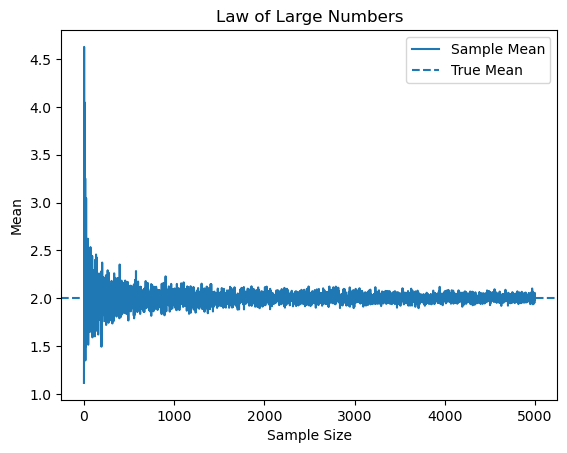

In [18]:
means = []
sizes = range(1,5000)
for n in sizes:
    s = np.random.choice(population,size = n)
    means.append(s.mean())
    
plt.plot(sizes,means,label="Sample Mean")
plt.axhline(true_mean,linestyle="--",label="True Mean")
plt.xlabel("Sample Size")
plt.ylabel("Mean")
plt.title("Law of Large Numbers")
plt.legend()
plt.show()

#### ML intuition:
* Training loss approaches true loss with more data
* Predictions stabilize as dataset grows

### 8. Central Limit Theorem (CLT)

Take non-Gaussian data and look at sample means.

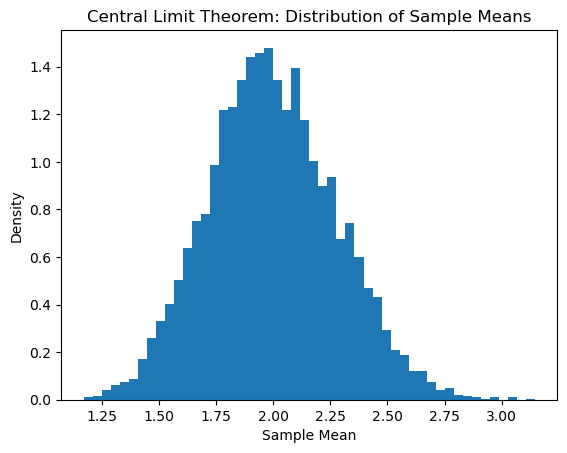

In [21]:
sample_means = []
for _ in range(5000):
    s = np.random.choice(population,size=50)
    sample_means.append(s.mean())
    
plt.hist(sample_means,bins=50,density =True)
plt.title("Central Limit Theorem: Distribution of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()

#### ML intuition:
* Raw data is exponential (skewed)
* Averages become approximately normal
* Explains why Gaussian assumptions often work

### 9. Why this matters directly in ML
|Concept | ML Impact|
|----|----|
|Random sampling|Valid generalization|
|Stratification|Stable classification|
|Bootstrapping|Ensemble robustness|
|LLN|Training stability|
|CLT|Gaussian loss functions|

### Final ML takeaway
* Data quantity stabilizes learning more than model complexity
* Sampling strategy defines model reliability
* Bootstrapping creates diversity without new data
* LLN and CLT explain why ML models converge